# 可选实验室：线性回归的梯度下降

<figure>
    <center> <img src="../images/C1_W1_L4_S1_Lecture_GD.png"  style="width:800px;height:200px;" ></center>
</figure>

## 目标

在本实验室中，您将

- 使用梯度下降法自动优化$w$和$b$。

## 工具

在本实验室中，我们将使用：

- NumPy，一种流行的科学计算库
- Matplotlib，用于绘制数据的流行库
- 本地目录中lab_utils.py文件中的绘图例程

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_style.lab_utils_uni import plt_contour_wgrad, plt_divergence, plt_gradients

plt.style.use('deeplearning.mplstyle')

## 问题描述

让我们使用与之前相同的两个数据点——1000平方英尺的房屋售价为30万美元，2000平方英尺的房屋售价为50万美元。

| 面积（1000平方英尺） | 价格（千美元） |
|--------------|---------|
| 1            | 300     |
| 2            | 500     |

In [3]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

## compute_cost

这是在上一个实验室开发的。我们在这里还会用到它。

In [4]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2
    total_cost = 1 / (2 * m) * cost
    return total_cost

## 梯度下降总结

在本课程中，您已经建立了一个线性模型来预测$f_{w,b}(x^{(i)})$：

$$f_{w,b}(x^{(i)}) wx^{(i)}+b\tag{1}$$

在线性回归中，您利用输入的训练数据来拟合参数$w$、$b$，方法是最大限度地减小预测结果$f_{w,b}(x^{(i)})$与实际数据$y^{(i)}$之间的误差。这个度量称为$cost$，即$J(w,b)$。在训练过程中，您可以测量所有训练样本$x^{(i)},y^{(i)}$的成本

$$J(w,b)=\frac{1}{2m}\sum\limits_{i = 0}^{m-1}(f_{w,b}(x^{(i)})-y^{(i)})^2\tag{2}$$ 

在讲座中，*梯度下降*被描述为

重复直到收敛：

$$
w=w-\alpha \frac{\partial J(w,b)}{\partial w} \tag{3}
$$

$$
b=b-\alpha \frac{\partial J(w,b)}{\partial b} \tag{4}
$$

其中，参数$w$、$b$同时更新。 

梯度定义如下

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

这里的*同时地*指的是，在更新任何参数之前，先计算所有参数的偏导数。

## 实施梯度下降算法

您将为一个特征实现梯度下降算法。您将需要三个函数。

- 实现上述公式（4）和（5）的`compute_gradient`
- 实现上述公式（2）的`compute_cost`（代码来自之前的实验室）
- 利用`compute_gradient`和`compute_cost`的`gradient_descent`

约定：

- 包含偏导数的python变量的命名遵循这种模式，$\frac{\partial J(w,b)}{\partial b}$将被命名为`dj_db`。

- w.r.t表示 “相对于”，如$J(wb)$的偏导数相对于$b。

### compute_gradient

`compute_gradient`实现了上面的（4）和（5），并返回$\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$。

嵌入的注释描述操作。

In [5]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

<img align="left" src="../images/C1_W1_Lab03_lecture_slopes.PNG"   style="width:340px;" >

讲座介绍了梯度下降法如何利用代价相对于某一点参数的偏导数来更新该参数。

让我们使用`compute_gradient`函数来查找并绘制代价函数相对于参数之一$w_0$的偏导数。


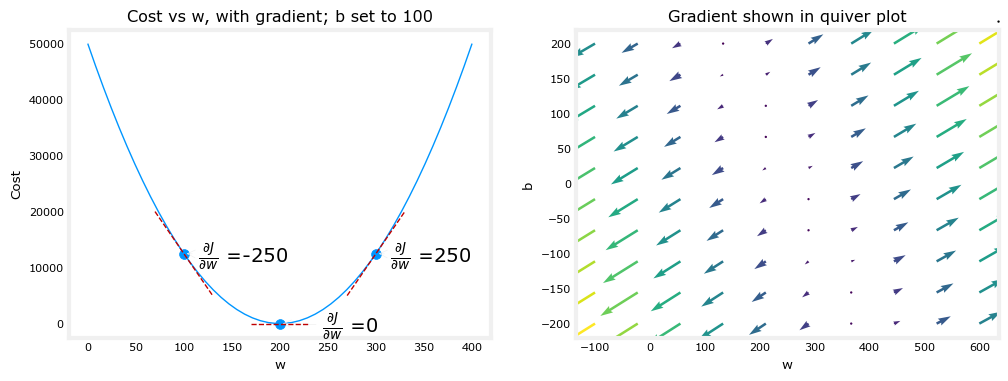

In [6]:
plt_gradients(x_train, y_train, compute_cost, compute_gradient)
plt.show()

上图中，左图显示了$\frac{\partial J(w,b)}{\partial w}$或三点处成本曲线相对于$w$的斜率。在图的右侧，导数为正，而在左侧，导数为负。由于“碗形”的原因，导数总是会导致梯度向底部下降，在底部梯度为零。
 
左边的图中，$b=100$。梯度下降将利用$\frac{\partial J(w,b)}{\partial w}$和 $\frac{\partial J(w,b)}{\partial b}$来更新参数。右侧的“颤动图”提供了一种查看这两个参数梯度的方法。箭头大小反映了该点的梯度大小。箭头的方向和斜率反映了该点的 $\frac{\partial J(w,b)}{\partial w}$和$\frac{\partial J(w,b)}{\partial b}$的比率。

请注意，梯度点*远离*最小值。回顾上面的公式（3）。缩放梯度是从$w$或$b$的当前值中*减去*的。这将使参数向降低成本的方向移动。

### 梯度下降

既然可以计算梯度，上文公式（3）所描述的梯度下降就可以在下面的`gradient_descent`中实现。实现的细节将在注释中描述。下面，你将利用这个函数在训练数据上找到$w$和$b$的最佳值。

In [7]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    j_history = []
    p_history = []
    b = b_in
    w = w_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        j_history.append(cost_function(x, y, w, b))
        p_history.append([w, b])
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {j_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w, b, j_history, p_history

In [8]:
w_init = 0
b_init = 0
iterations = 100000
tmp_alpha = 1.0e-2
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations,
                                                    compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 10000: Cost 6.74e-06  dj_dw: -5.215e-04, dj_db:  8.439e-04   w:  2.000e+02, b: 1.00012e+02
Iteration 20000: Cost 3.09e-12  dj_dw: -3.532e-07, dj_db:  5.714e-07   w:  2.000e+02, b: 1.00000e+02
Iteration 30000: Cost 1.42e-18  dj_dw: -2.393e-10, dj_db:  3.869e-10   w:  2.000e+02, b: 1.00000e+02
Iteration 40000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 50000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 60000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 70000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 80000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 90000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.0

<img align="left" src="../images/C1_W1_Lab03_lecture_learningrate.PNG"  style="width:340px; padding: 15px; " > 

请花点时间，注意上面印出的梯度下降过程的一些特征。 

- 正如讲座幻灯片中描述的那样，成本一开始很大，然后迅速下降。
- 偏导数`dj_dw`和`dj_db`也开始迅速变小，然后变得越来越慢。如讲座中的图表所示，当过程接近“碗底”时，由于此时的导数值较小，进度会变慢。
- 虽然学习率alpha保持不变，但进度会减慢

### 梯度下降的成本与迭代次数 

成本与迭代次数的关系图是衡量梯度下降过程进展的有用指标。在成功的运行中，成本总是会降低的。最初的成本变化非常快，因此用不同于最终下降的比例绘制最初的成本变化是非常有用的。在下面的图中，请注意坐标轴上的成本比例和迭代步长。

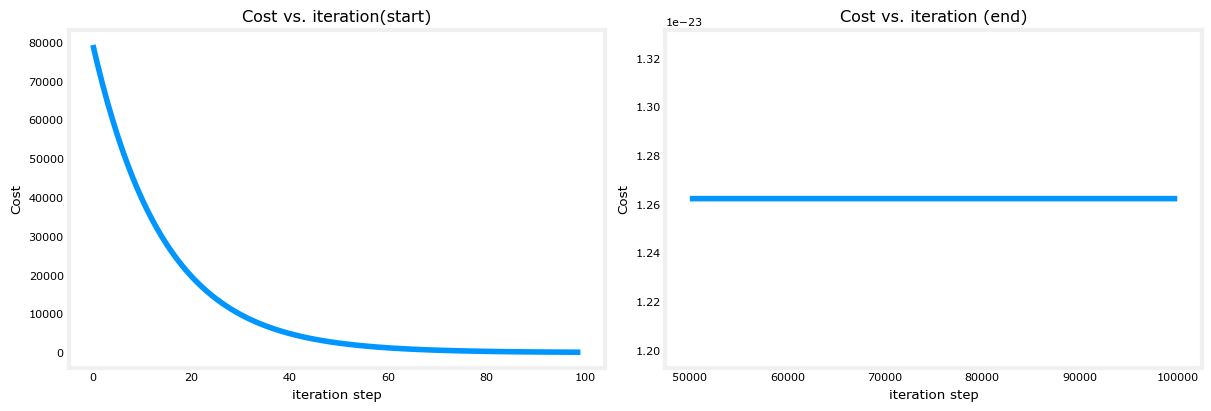

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist[:100])
ax2.plot(50000 + np.arange(len(J_hist[50000:])), J_hist[50000:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()

### 预测

现在，您已经找到了参数$w$和$b$的最佳值，现在可以使用模型根据我们学习到的参数预测房屋价值。不出所料，预测值与相同房屋的训练值几乎相同。此外，预测值以外的值与预期值一致。

In [10]:
print(f"1000 sqft house prediction {w_final * 1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final * 1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final * 2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


## 绘制

通过在`cost(w,b)`的等值线图上绘制迭代时的代价，可以显示梯度下降过程中的进展情况。

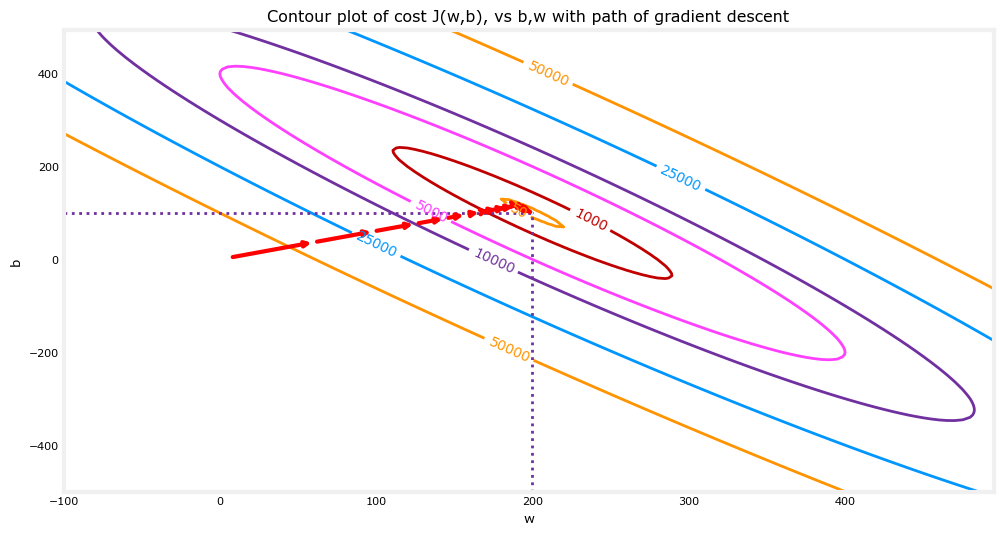

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

上面的等值线图显示了在$w$和$b$范围内的$cost(w,b)$。成本水平用圆环表示。红色箭头表示梯度下降的路径。这里有一些值得注意的地方：

- 路径朝着目标稳步（单调）前进。
- 初始步长远大于目标附近的步长。

**放大**，我们可以看到梯度下降的最后几步。请注意，随着梯度趋近于零，各步之间的距离在缩小。

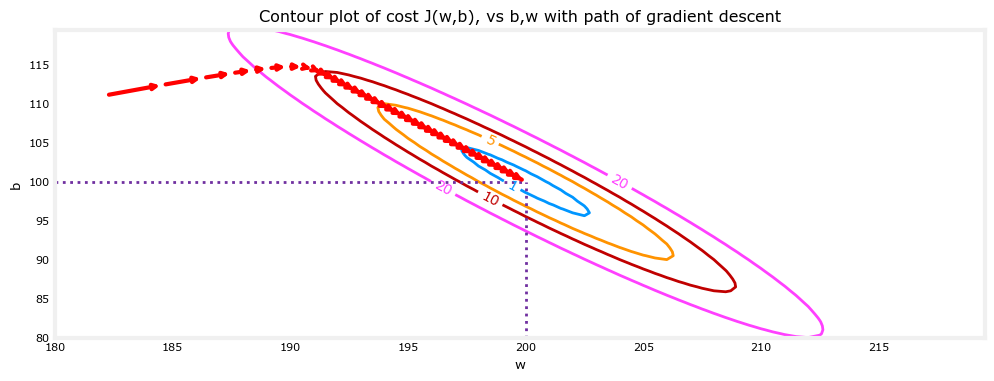

In [12]:
fig_final, ax = plt.subplots(1, 1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
                  contours=[1, 5, 10, 20], resolution=0.5)

### 提高学习率

<figure>
 <img align="left", src="../images/C1_W1_Lab03_alpha_too_big.PNG"   style="width:340px;height:240px;" >
</figure>

在讲座中，大家讨论了方程（3）中学习率$\alpha$的适当值。$\alpha$越大，梯度下降收敛到解决方案的速度就越快。但是，如果它太大，梯度下降就会发散。上面是一个很好收敛的解的例子。

让我们试着增加$\alpha$的值，看看会发生什么：

In [13]:
w_init = 0
b_init = 0
iterations = 10
tmp_alpha = 8.0e-1
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04


上面，$w$和$b$在正负之间来回跳动，每次迭代的绝对值都在增加。此外，每次迭代$\frac{\partial J(w,b)}{\partial w}$的符号都会改变，成本不减反增。这是一个明显的信号，表明*学习率过大*，解正在发散。

让我们用绘图来直观地说明这一点。

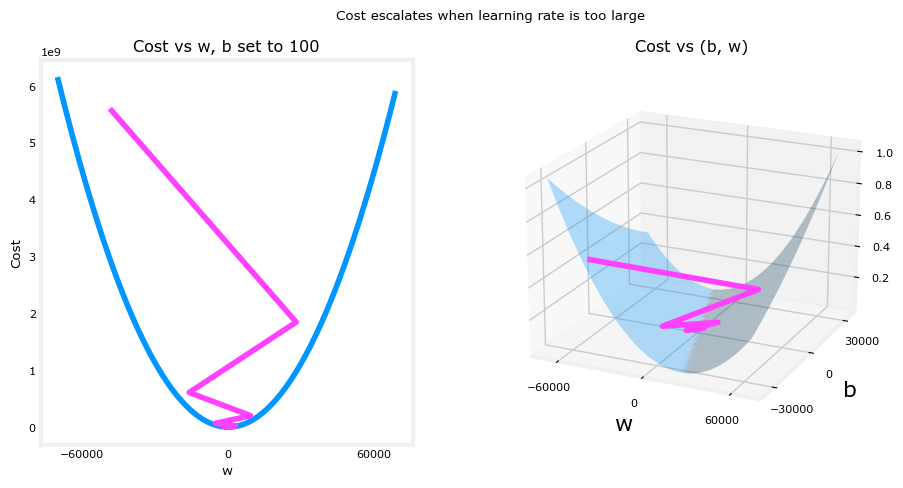

In [14]:
plt_divergence(p_hist, J_hist, x_train, y_train)
plt.show()

上图左侧显示了$w$在梯度下降最初几步中的变化情况。$w$由正变负，成本快速增长。梯度下降同时对$w$和$b$起作用，因此我们需要右边的三维图来了解全貌。

## 祝贺！

在本实验中，你

- 深入研究了单变量梯度下降的细节。
- 开发了计算梯度的程序
- 将梯度可视化
- 完成梯度下降例程
- 利用梯度下降法查找参数
- 研究了学习率大小的影响